# Import libraries

In [125]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
warnings.filterwarnings("ignore")

In [126]:
def simple_chart(df, x, title = None, hue = None):
    plt.figure(figsize = (10, 6))
    plt.title(title, fontsize=14)
    ax = sns.countplot(x = x, hue = hue, data = df)

In [127]:
def factor_chart(df, x, y, hue = None):
    ax = sns.factorplot(x = x, y = y, data = df, hue = hue, kind = 'box', size=6, aspect = 2)

In [128]:
def scatter(df, x, y, hue = None):
    plt.figure(figsize = (20, 10))
    ax = sns.scatterplot(x = x, y = y, data = df, hue = hue)
    plt.show()

# Load data into dataframe

In [129]:
df=pd.read_csv('./df_for_sale_riga_11102023.csv')

In [130]:
df.describe()

,rooms,area,price,cur_floor,total_floor,lift,len,lon
count,3357.000000,3357.000000,3.357000e+03,3357.000000,3357.000000,3357.000000,3357.000000,3357.000000
mean,2.361037,62.406807,9.905900e+04,3.484659,5.975871,0.310098,56.889141,24.101826
std,1.007189,37.609565,1.010415e+05,2.402228,3.260951,0.462603,1.999979,0.869331
min,1.000000,12.000000,-1.000000e+00,1.000000,1.000000,0.000000,-1.000000,-1.000000
25%,2.000000,42.000000,4.250000e+04,2.000000,5.000000,0.000000,56.941877,24.095530
50%,2.000000,53.000000,6.400000e+04,3.000000,5.000000,0.000000,56.956327,24.131470
75%,3.000000,72.000000,1.200000e+05,5.000000,7.000000,1.000000,56.968749,24.178205
max,6.000000,529.000000,1.950000e+06,23.000000,31.000000,1.000000,57.076784,24.322615


In [131]:
empty_count=df.isna().sum()

In [132]:
print(empty_count)

district          0
data_street       0
rooms             0
area              0
price             0
cur_floor         0
total_floor       0
lift              0
seria             0
house_type        0
facilities     1173
len               0
lon               0
dtype: int64


# Add variable Price per sq meter

In [133]:
df['price_per_sqm']=df['price']/df['area']

# Cap number of floors to total_floors:

In [134]:
df['floor'] = np.where(df['total_floor']<df['cur_floor'], df['total_floor'],df['cur_floor'])

In [135]:
df['floor'].describe()

count    3357.000000
mean        3.478701
std         2.397215
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        23.000000
Name: floor, dtype: float64

In [136]:
empty_count=df.isna().sum()
print(empty_count)

district            0
data_street         0
rooms               0
area                0
price               0
cur_floor           0
total_floor         0
lift                0
seria               0
house_type          0
facilities       1173
len                 0
lon                 0
price_per_sqm       0
floor               0
dtype: int64


# Combine house type

In [137]:
unique_house_types=df['house_type'].unique()
print(unique_house_types)

['Mūra' 'Koka' 'Paneļu' 'Ķieģeļu' 'Ķieģeļu-paneļu' 'Paneļu - ķieģeļu'
 "mnu('map',1,1,'/lv/gmap/fTgTeF4QAzt4FD4eFFM=.html?mode=1&c=56.9505946, 24.1984012, 14');return false;"]


In [138]:
df=df[df['house_type']!="mnu('map',1,1,'/lv/gmap/fTgTeF4QAzt4FD4eFFM=.html?mode=1&c=56.9505946, 24.1984012, 14');return false;"]

In [139]:
#Consolidate brick, panel, brick-panel, panel-brick in one

In [140]:
df['house_type']=df['house_type'].replace(['Ķieģeļu', 'Paneļu', 'Ķieģeļu-paneļu', 'Paneļu - ķieģeļu'], 'Brick-Panel')

In [141]:
unique_house_types=df['house_type'].unique()
print(unique_house_types)

['Mūra' 'Koka' 'Brick-Panel']


In [142]:
replace_house_type={'Mūra': 'Masonry','Koka':'Wood'}
df=df.replace(replace_house_type)

In [143]:
unique_house_types=df['house_type'].unique()
print(unique_house_types)

['Masonry' 'Wood' 'Brick-Panel']


# Combine house seria

In [144]:
unique_house_seria=df['seria'].unique()
print(unique_house_seria)

['P. kara' '602.' 'Renov.' '103.' 'Staļina' 'LT proj.' '467.' 'Hrušč.'
 '119.' 'Jaun.' 'Specpr.' 'M. ģim.' 'Priv. m.' 'Čehu pr.' '104.']


In [145]:
Serial_apartments=['103.', 'LT proj.', 'Čehu pr.', 'Hrušč.', '602.', 'M. ģim.', 'Specpr.', '119.', '467.', '104.' ]
New_projects=['Jaun.']
Private_houses=['Priv. m.']
Post_war_appartments=['Staļina']
Pre_war_apartments=['P. kara']

In [146]:
from_values=['103.', 'LT proj.', 'Čehu pr.', 'Hrušč.', '602.', 'M. ģim.', 'Specpr.', '119.', '467.', '104.','Jaun.', 'Priv. m.','Staļina','P. kara', 'Renov.'] 
to_values=['Serial_apartments','Serial_apartments','Serial_apartments','Serial_apartments','Serial_apartments','Serial_apartments','Serial_apartments','Serial_apartments','Serial_apartments','Serial_apartments','New_projects','Private_houses','Post_war_appartments','Pre_war_apartments', 'Renovated']
df['house_seria_general']=df['seria'].map(dict(zip(from_values,to_values)))

In [147]:
unique_house_seria_general=df['house_seria_general'].unique()
print(unique_house_seria_general)

['Pre_war_apartments' 'Serial_apartments' 'Renovated'
 'Post_war_appartments' 'New_projects' 'Private_houses']


In [148]:
pivot_table_house_seria=df.pivot_table(index=["house_seria_general"],values="price_per_sqm",aggfunc=["mean","count"])
print(pivot_table_house_seria)

                              mean         count
                     price_per_sqm price_per_sqm
house_seria_general                             
New_projects           2275.612721           555
Post_war_appartments   1278.687509           129
Pre_war_apartments     1481.529953           564
Private_houses         1297.398383            18
Renovated              2204.921937           410
Serial_apartments      1039.625063          1680


# Create new variable - Daugava_bank

In [149]:
#Merge districs into two - Right bank and Left bank (Pardaugava). And compare average price per sq meter per house seria.

In [150]:
unique_districts=df['district'].unique()
print(unique_districts)

['centrs' 'Āgenskalns' 'Vecmīlgrāvis' 'Iļģuciems' 'Imanta' 'Mežaparks'
 'Ziepniekkalns' 'Bolderāja' 'Teika' 'Mangaļi' 'Ķengarags' 'Krasta r-ns'
 'Maskavas priekšpilsēta' 'Purvciems' 'Aplokciems' 'Vecrīga'
 'Sarkandaugava' 'Pļavnieki' 'Dārzciems' 'Daugavgrīva' 'Dzegužkalns'
 'Torņakalns' 'Mežciems' 'Jugla' 'Šampēteris-Pleskodāle' 'Zolitūde'
 'Jaunciems' 'Ķīpsala' 'Bieriņi' 'Katlakalns' 'Čiekurkalns' 'Grīziņkalns'
 'Bukulti' 'Berģi' 'Klīversala' 'Cits' 'Voleri' 'Rumbula' 'Šķirotava'
 'VEF' 'Dreiliņi' 'Mangaļsala' 'Brekši' 'Vecāķi' 'Dārziņi' 'Zasulauks']


In [151]:
#centrs and Vecrīga are excluded, as considered not representative

In [152]:
Pardaugava_districts=['Dzegužkalns', 'Imanta','Ziepniekkalns', 'Bolderāja','Ķīpsala','Klīversala','Āgenskalns','Ķengarags','Zolitūde','Daugavgrīva' 'Iļģuciems','Torņakalns', 'Šampēteris-Pleskodāle',
 'Bieriņi', 'Šķirotava','Zasulauks','Voleri', 'Katlakalns','Kleisti', 'Buļļi','Bišumuiža']

right_bank_districts=['Pļavnieki','Purvciems','Teika','centrs','Jugla','Grīziņkalns','Krasta r-ns',
 'Mangaļi','Vecmīlgrāvis', 'Mežaparks','Maskavas priekšpilsēta','Mežciems','Dārzciems', 'Čiekurkalns',
 'Sarkandaugava', 'Kundziņsala','Jaunciems', 'Vecdaugava','Vecāķi', 'VEF',
 'Dreiliņi', 'Berģi', 'Brekši', 'Mangaļsala', 'Bukulti','Aplokciems','Jaunmīlgrāvis']

In [153]:
df["Daugava_bank"]= df["district"].apply(lambda x:"Pardaugava" if x in Pardaugava_districts else "right_bank")

In [154]:
# Make variable Daugava_bank a numemic one
mapping={'right_bank':1, 'Pardaugava':0}
df['Daugava_bank']=df['Daugava_bank'].map(mapping)
df['Daugava_bank'].unique()

array([1, 0], dtype=int64)

# Add new variable floor/total number of floors

In [155]:
def floor_total(f):
    return str(f['cur_floor']) + " / " + str(f['total_floor'])
floor_total(df.iloc[1])
df.apply(floor_total, axis='columns')

0        4 / 6
1        1 / 2
2        1 / 9
3        2 / 2
4        9 / 9
         ...  
3352     2 / 9
3353     5 / 5
3354    6 / 12
3355     1 / 5
3356     4 / 4
Length: 3356, dtype: object

In [156]:
df['floor_total'] = df.apply(floor_total, axis='columns')

# Amend street

In [157]:
street_rules = [' k-1', ' k-2', ' k1', ' k 1', 'k-1', ' k-3', '-k-3', ' k-4', ' k. 1', 'k5', 'k1', 'k2',' k-6','k-4',', k-5',' k-7','k4',' k-6',' k-5','k3']

for n in street_rules:
    df['street'] = df["data_street"].apply(lambda x: str(x).replace(n, '').strip())

In [158]:
street_rules2 = [[' g.', ' gatve'],
                 ['krastm.', 'krastmala'],
                 [' pr.', ' prospekts'],
                 ['Pulkv.', 'Pulkveža'],
                 ['bulv.', 'bulvāris'],
                 ['šķ. l.', 'šķērslīnija'],
                 ['šķ l.', 'šķērslīnija'],
                 [' l. ', ' līnija '],
                 [' d. ', ' dambis '],
                 [' g. ', ' gatve '],
                 [' lauk.', ' laukums'],
                 [' š. ', ' šoseja '],
                 [' a', 'a'],
                 [' b', 'b']]

for n in street_rules2:   
    df['street'] = df["street"].apply(lambda x: str(x).replace(n[0], n[1]).strip())

In [159]:
def address_name(row):
    text = row['street']
    indx = 99
    if text.count(" ")==1:
        indx = text.find(" ") 
    if text.count(" ")==2:
        indx = text.find(" ",text.find(" ")+1)
    if text.count(" ")==3:
        indx = text.find(" ", text.find(" ",text.find(" ")+1)+1)  
    if text.count(" ")==4:
        indx = text.find(" ",text.find(" ", text.find(" ",text.find(" ")+1)+1) +1)
    
    return text[:indx]  


def address_number(row):
    text = row['street']
    indx = 99
    if text.count(" ")==1:
        indx = text.find(" ") 
    if text.count(" ")==2:
        indx = text.find(" ",text.find(" ")+1)
    if text.count(" ")==3:
        indx = text.find(" ", text.find(" ",text.find(" ")+1)+1)  
    if text.count(" ")==4:
        indx = text.find(" ",text.find(" ", text.find(" ",text.find(" ")+1)+1) +1)
    
    return text[indx+1:]    

In [160]:
df['street_name']  = df.apply(address_name, axis=1)
df['street_number']  = df.apply(address_number, axis=1)

# Check for outliers in latitude and longitude

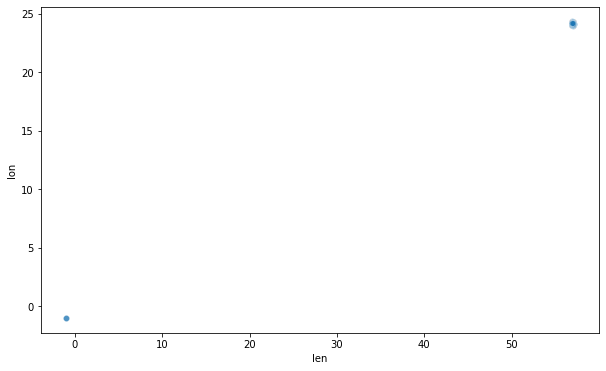

In [161]:
plt.figure(figsize = (10, 6))
ax = sns.scatterplot(x = 'len', y = 'lon', data = df, hue = None, alpha=0.4)
plt.show()

In [162]:
df.to_csv('amended data.csv')